<a href="https://colab.research.google.com/github/Gao20/CI/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to pandas
## What you will learn



*   Series and Dataframe data structures
*   Loading data
*   Some operations on the data
*   Visualizing data with matplotlib

From pandas creators...

"pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

pandas is a [NumFOCUS](https://www.numfocus.org/open-source-projects.html) sponsored project. This will help ensure the success of development of pandas as a world-class open-source project, and makes it possible to donate to the project." --- http://pandas.pydata.org/

**pandas** is a python library built ontop of numpy (and so is many data analysis python libraries)






# Series data structure

This is a one-dimensional array with labelled indexes.
We create a series object as follows:

*arr = pd.Series(data, index=index)*


*   data could be any a numpy ndarray, python dictionary , etc
*   index is a list a labels (default labels are 0, 1, 3, ...)





In [1]:
# Import  numpy and pandas
import numpy as np
import pandas as pd
print("numpy version: " + np.__version__)
print("pandas version: " + pd.__version__)

numpy version: 1.16.4
pandas version: 0.24.2


In [2]:
# create a series
ser1 = pd.Series(np.random.randint(100, size=10)) # 10 integers in [0, 100) with default index labels
print(ser1)

0    69
1    79
2    98
3    14
4    15
5    34
6    55
7    46
8    61
9     9
dtype: int64


You can learn more about numpy random number sampling at [scipy random](https://docs.scipy.org/doc/numpy-1.16.1/reference/routines.random.html)

In [3]:
# create a series with custom index labels
ser2 = pd.Series(np.random.randn(10), index=['a','b','c','d','e','f','g','h','i','j'])
print(ser2)


a    0.906856
b   -1.283732
c    0.946836
d    1.007346
e    1.766710
f   -0.403913
g   -0.104183
h   -0.388315
i    2.505988
j   -0.914992
dtype: float64


In [4]:
# create a series from a python dictionary
dic = {1:"Man City", 2:"Liverpool", 3:"Chelsea", 4:"Spurs", 5:"Arsenal", 6:"Man United"}
ser3 = pd.Series(dic)
print(ser3)


1      Man City
2     Liverpool
3       Chelsea
4         Spurs
5       Arsenal
6    Man United
dtype: object


In [5]:
# create a series with a constant
ser4 = pd.Series(51, index=['a','b','c','d','e'])
ser5 = pd.Series("Play", index=['f','i','q', 'u', 'r'])
print(ser4)
print(ser5)


a    51
b    51
c    51
d    51
e    51
dtype: int64
f    Play
i    Play
q    Play
u    Play
r    Play
dtype: object


In [6]:
# selecting from a series or just being numpy!
print(ser2)
print("\nser2['f'] = " + str(ser2['f']))
print("\n")
print(ser2[:2]) # first two values
print("\n" + str(ser2[ser2<0])) # values less than 0
ser2['a'] = 0.05  # change value
print(ser2)
ser2B = ser2[ser2>0] # which values are greater than 0
print("\n" + str(ser2B))

a    0.906856
b   -1.283732
c    0.946836
d    1.007346
e    1.766710
f   -0.403913
g   -0.104183
h   -0.388315
i    2.505988
j   -0.914992
dtype: float64

ser2['f'] = -0.40391343499723475


a    0.906856
b   -1.283732
dtype: float64

b   -1.283732
f   -0.403913
g   -0.104183
h   -0.388315
j   -0.914992
dtype: float64
a    0.050000
b   -1.283732
c    0.946836
d    1.007346
e    1.766710
f   -0.403913
g   -0.104183
h   -0.388315
i    2.505988
j   -0.914992
dtype: float64

a    0.050000
c    0.946836
d    1.007346
e    1.766710
i    2.505988
dtype: float64


The API of the Series class can be found  [here](http://pandas.pydata.org/pandas-docs/stable/reference/series.html)

# DataFrame data structure

This is a two dimensional data structure. Its actually a lot more like a Microsoft Excel sheet or a database table. Its made up of columns and rows. Just like with the Series data structure the row and column labels can be customized.

In [7]:
# create a dataframe using Series data structures
s1 = pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
s2 = pd.Series(np.random.randn(4), index=['a','b','c','d'])
dic = {"col1" : s1, "col2" : s2}
pd1 = pd.DataFrame(dic) # a missing entry is represented as NaN (Not a Number)
print(pd1)

       col1      col2
a -1.236435 -0.981881
b  0.276827 -2.437976
c  1.149648  0.613113
d -2.046053  0.640876
e  0.940690       NaN


In [9]:
# create a dataframe using an array
pd2 = pd.DataFrame([[1, 2, 3],[4, 5, 6]], index=['A', 'B'], columns=['a', 'b', 'c']) # Make  keys to be rows
print(pd2)

   a  b  c
A  1  2  3
B  4  5  6


In [14]:
# create a dataframe with different columns (keys are rows by default)
pd3 = pd.DataFrame({ 'A' : 1.,
                   'B': pd.date_range('20151101', periods=4), # generate dates
                   'D' : pd.Categorical(["test","train","test","train"]),
                   'E' : ["foo","bar","foo","bar"] }
                   ,index = ['first','second','third','fourth']
                  )
print(pd3)
pd3  # this probably looks much nicer!

          A          B      D    E
first   1.0 2015-11-01   test  foo
second  1.0 2015-11-02  train  bar
third   1.0 2015-11-03   test  foo
fourth  1.0 2015-11-04  train  bar


,A,B,D,E
first,1.0,2015-11-01,test,foo
second,1.0,2015-11-02,train,bar
third,1.0,2015-11-03,test,foo
fourth,1.0,2015-11-04,train,bar


In [18]:
# display column and row names
print(pd3.columns) # column names
print(pd3.axes[1]) # row names


Index(['A', 'B', 'D', 'E'], dtype='object')
Index(['A', 'B', 'D', 'E'], dtype='object')


In [20]:
print(pd3.info()) # dataframe info

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, first to fourth
Data columns (total 4 columns):
A    4 non-null float64
B    4 non-null datetime64[ns]
D    4 non-null category
E    4 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 228.0+ bytes
None


In [21]:
# change type of column A from float64 to int64
pd3['A'] = pd3['A'].astype('int64')
print(pd3.info())
pd3

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, first to fourth
Data columns (total 4 columns):
A    4 non-null int64
B    4 non-null datetime64[ns]
D    4 non-null category
E    4 non-null object
dtypes: category(1), datetime64[ns](1), int64(1), object(1)
memory usage: 228.0+ bytes
None


,A,B,D,E
first,1,2015-11-01,test,foo
second,1,2015-11-02,train,bar
third,1,2015-11-03,test,foo
fourth,1,2015-11-04,train,bar


In [22]:
# select a row by label -- you get a Series
pd3.loc['third']

A                      1
B    2015-11-03 00:00:00
D                   test
E                    foo
Name: third, dtype: object

In [23]:
# select first two rows
pd3.loc[:'second']

,A,B,D,E
first,1,2015-11-01,test,foo
second,1,2015-11-02,train,bar


In [26]:
# select first two rows and last two columns
pd3.loc[:'second', 'D':]

,D,E
first,test,foo
second,train,bar


In [25]:
# select first two columns
pd3.loc[:,:'B']

,A,B
first,1,2015-11-01
second,1,2015-11-02
third,1,2015-11-03
fourth,1,2015-11-04


In [27]:
# selection - another way
print(pd3.iloc[:1, :]) # first row
print("=============================================")
print(pd3.iloc[:,0:5:2])

       A          B     D    E
first  1 2015-11-01  test  foo
        A      D
first   1   test
second  1  train
third   1   test
fourth  1  train


In [28]:
pd3[pd3.D != 'train'] # select rows where column D does not equal 'train'

,A,B,D,E
first,1,2015-11-01,test,foo
third,1,2015-11-03,test,foo


In [29]:
# sort by column D
pd3.sort_values(by=['D'], inplace=True)
pd3

,A,B,D,E
first,1,2015-11-01,test,foo
third,1,2015-11-03,test,foo
second,1,2015-11-02,train,bar
fourth,1,2015-11-04,train,bar


In [30]:
# groupby
print(pd3.groupby(['D']).groups.keys())
print("================================")
print(pd3.groupby(['D'])['A'].sum())

dict_keys(['test', 'train'])
D
test     2
train    2
Name: A, dtype: int64


In [32]:
# Change some values
pd3.loc['second','A'] = 2.0
pd3.loc['third','A'] = 3.0
pd3

,A,B,D,E
first,1.0,2015-11-01,test,foo
third,3.0,2015-11-03,test,foo
second,2.0,2015-11-02,train,bar
fourth,1.0,2015-11-04,train,bar


In [33]:
# add a column
pd3['F'] = 1.0 # default value is 1.0
pd3

,A,B,D,E,F
first,1.0,2015-11-01,test,foo,1.0
third,3.0,2015-11-03,test,foo,1.0
second,2.0,2015-11-02,train,bar,1.0
fourth,1.0,2015-11-04,train,bar,1.0


In [34]:
# Add another column
(rows, cols) = pd3.shape # get number of rows and number of columns
pd3.insert(cols, 'G', 'Positive')
pd3

,A,B,D,E,F,G
first,1.0,2015-11-01,test,foo,1.0,Positive
third,3.0,2015-11-03,test,foo,1.0,Positive
second,2.0,2015-11-02,train,bar,1.0,Positive
fourth,1.0,2015-11-04,train,bar,1.0,Positive


In [35]:
# column F's values will be column A's squared and 1 subtracted
pd3['F'] = pd3['A']**2 - 1
pd3
pd3['G'] = pd3['F'] - pd3['A']
pd3

,A,B,D,E,F,G
first,1.0,2015-11-01,test,foo,0.0,-1.0
third,3.0,2015-11-03,test,foo,8.0,5.0
second,2.0,2015-11-02,train,bar,3.0,1.0
fourth,1.0,2015-11-04,train,bar,0.0,-1.0


In [36]:
# Adding a new column and values based on other columns
for idx, row in pd3.iterrows():
    if row.G  < 0:
        pd3.loc[idx,'sign']='negative'
    elif (row.G == 0):
        pd3.loc[idx,'sign']='neutral'
    else:
        pd3.loc[idx,'sign']='positive'
pd3

,A,B,D,E,F,G,sign
first,1.0,2015-11-01,test,foo,0.0,-1.0,negative
third,3.0,2015-11-03,test,foo,8.0,5.0,positive
second,2.0,2015-11-02,train,bar,3.0,1.0,positive
fourth,1.0,2015-11-04,train,bar,0.0,-1.0,negative


In [38]:
# A more cool way of doing it!
def process(row):
    if row.G <  0:
        return 'Bogey'
    elif (row.G == 0):
        return 'Even'
    else:
        return 'Birdie'

pd3['golf'] = pd3.apply(process, axis = 1)
#pd3 = pd3.drop('golf', axis = 1)  # axis = 1 means column, so we are deleting a column
pd3


,A,B,D,E,F,G,sign,golf
first,1.0,2015-11-01,test,foo,0.0,-1.0,negative,Bogey
third,3.0,2015-11-03,test,foo,8.0,5.0,positive,Birdie
second,2.0,2015-11-02,train,bar,3.0,1.0,positive,Birdie
fourth,1.0,2015-11-04,train,bar,0.0,-1.0,negative,Bogey


In [39]:
# More operations
print(pd3.A.sum()) # display sum of column A
print(pd3[['A', 'F']].sum()) # display sum of columns A and F

7.0
A     7.0
F    11.0
dtype: float64


In [40]:
# show distribution of sign
pd3['sign'].value_counts()


negative    2
positive    2
Name: sign, dtype: int64

In [41]:
# Selecting rows where col A value is greather than col F value
sign = pd3[pd3.A > pd3.F]
sign

,A,B,D,E,F,G,sign,golf
first,1.0,2015-11-01,test,foo,0.0,-1.0,negative,Bogey
fourth,1.0,2015-11-04,train,bar,0.0,-1.0,negative,Bogey


In [42]:
# Add a new row
pd3.loc['fifth'] = [2, np.datetime64('2015-11-05'), 'train', 'foo', 10.0, -1.0, 'negative', 'Bogey']
pd3

,A,B,D,E,F,G,sign,golf
first,1.0,2015-11-01,test,foo,0.0,-1.0,negative,Bogey
third,3.0,2015-11-03,test,foo,8.0,5.0,positive,Birdie
second,2.0,2015-11-02,train,bar,3.0,1.0,positive,Birdie
fourth,1.0,2015-11-04,train,bar,0.0,-1.0,negative,Bogey
fifth,2.0,2015-11-05,train,foo,10.0,-1.0,negative,Bogey


In [44]:
# medians
print(pd3)
med = pd3[['A', 'F','G']].median()
med

          A          B      D    E     F    G      sign    golf
first   1.0 2015-11-01   test  foo   0.0 -1.0  negative   Bogey
third   3.0 2015-11-03   test  foo   8.0  5.0  positive  Birdie
second  2.0 2015-11-02  train  bar   3.0  1.0  positive  Birdie
fourth  1.0 2015-11-04  train  bar   0.0 -1.0  negative   Bogey
fifth   2.0 2015-11-05  train  foo  10.0 -1.0  negative   Bogey


A    2.0
F    3.0
G   -1.0
dtype: float64

In [45]:
# Other ops
print(pd3)
means = pd3[['A', 'F','G']].mean()

print(means)

          A          B      D    E     F    G      sign    golf
first   1.0 2015-11-01   test  foo   0.0 -1.0  negative   Bogey
third   3.0 2015-11-03   test  foo   8.0  5.0  positive  Birdie
second  2.0 2015-11-02  train  bar   3.0  1.0  positive  Birdie
fourth  1.0 2015-11-04  train  bar   0.0 -1.0  negative   Bogey
fifth   2.0 2015-11-05  train  foo  10.0 -1.0  negative   Bogey
A    1.8
F    4.2
G    0.6
dtype: float64


In [46]:
# some processing: return the row label with maximum value in the A column
max_A = pd3.A.max()
print("max_A = " + str(max_A))
rows = pd3[pd3.A == max_A]
print(rows)
print(rows.axes[0][0])

max_A = 3.0
         A          B     D    E    F    G      sign    golf
third  3.0 2015-11-03  test  foo  8.0  5.0  positive  Birdie
third


# Loading Data from a csv File

This is perhaps the easiest way of loading data. One can also read Excel, JSON, SQL, etc.

In [47]:
# mounting my google drive
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = "gdrive/My Drive/indabax_2019/kc_house_data.csv"
data = pd.read_csv(path) # Need to copy the file to your google drive folder

In [0]:
# check if file was loaded
data.head() # top 5 lines of the file

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
data.tail() # last five lines of the file

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Are there cells with missing values?
data.isnull().values.any()

False

In [0]:
data.info() # data description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [0]:
# save data as csv with a different name
data.to_csv("sample_data/house_data.csv")

In [0]:
data.describe()  # some data stats. Notice a house with 33 bedrooms?

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
# Get a Series of bedrooms
data.bedrooms # number bedrooms column - this is a Series - could also use data['bedrooms']

In [0]:
# get number of bedrooms and price  -- the result is a dataframe
price_bedrooms = data[['bedrooms', 'price']]
price_bedrooms.head()

,bedrooms,price
0,3,221900.0
1,3,538000.0
2,2,180000.0
3,4,604000.0
4,3,510000.0


In [0]:
# get distribution of number of bedrooms
bd_counts = data['bedrooms'].value_counts()
print(type(bd_counts))
print(bd_counts)
print("Number of 3-bedroom houses = " + str(bd_counts[3]))

<class 'pandas.core.series.Series'>
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Number of 3-bedroom houses = 9824


# Plotting Stuff with Matplotlib



In [0]:
# Need to import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

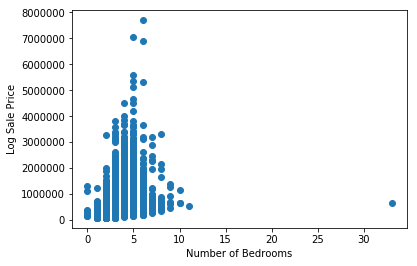

In [0]:
# plotting number of bedrooms vs price 
y = data['price']
plt.scatter(x=data['bedrooms'], y=y)
plt.ylabel('Log Sale Price')
plt.xlabel('Number of Bedrooms')
plt.show()

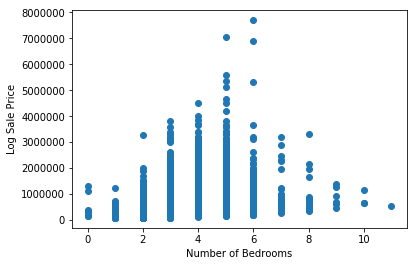

In [0]:
# removing the outlier and plotting again
data_r = data[data.bedrooms < 13]
y = data_r['price']
plt.scatter(x=data_r['bedrooms'], y=y)
plt.ylabel('Log Sale Price')
plt.xlabel('Number of Bedrooms')
plt.show()

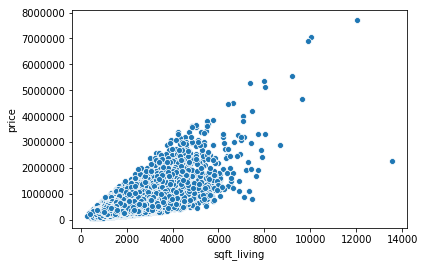

In [0]:
# Seaborn plotting
sns.scatterplot(x="sqft_living", y="price", data=data_r);

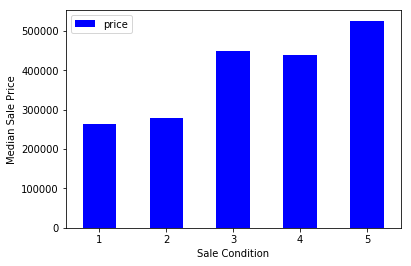

In [0]:
#print(data.zipcode.value_counts())
condition_pivot = data.pivot_table(index='condition', values='price', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [0]:
# Cool graphs
sns.pairplot(data[['price', 'bedrooms', 'sqft_living', ]], height=2.5)
plt.tight_layout()
